In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.
C:\Users\trytr\PycharmProjects\ML Demo\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\trytr\PycharmProjects\ML Demo\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\trytr\PycharmProjects\ML Demo\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\trytr\PycharmP

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
trans = [ "T-shirt",
          "Trouser",
         "Pullover",
            "Dress",
             "Coat",
           "Sandal",
            "Shirt",
          "Sneaker",
              "Bag",
       "Ankle boot"]

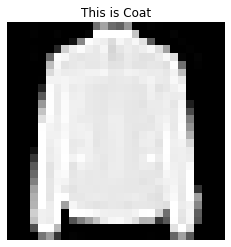

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
idx = random.randint(0, 59999)
plt.title("This is {}".format(trans[y_train[idx]]))
plt.axis("off")
plt.imshow(x_train[idx], cmap="gray")

In [5]:
# keras: 建立模型兩種方式 Sequential(層疊式) Model(?)
from keras.models import Sequential
# Dense: 全連接層
from keras.layers import Dense
model = Sequential()
# 784 * 128(全連接) + 128(bias) = 100480
model.add(Dense(128, activation="relu", input_dim=784))
# 128 * 10(全連接) + 10(bias) = 1290
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# loss: 跟正確答案的距離
# oprimizer: 梯度下降的優化器
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [7]:
from keras.utils.np_utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Label Description
0     T-shirt/top
1     Trouser
2     Pullover
3     Dress
4     Coat
5     Sandal
6     Shirt
7     Sneaker
8     Bag
9     Ankle boot

In [8]:
# batch_size: 看多少筆資料再平均做一次調整, 100~200(建議), 5~20(大圖片)
# epochs: 整份訓練資料到底要看過幾遍(控制模型什麼時候該訓練完成)
# validation_split:(train_test_split)切分多少測試資料出來
# verbose: (log要有多少程度) 1(預設):會有進度條 2: 必要資訊  0: 安靜
# 1 epoch: 多少次梯度下降 54000 / 200 = 270(次)
model.fit(x_train_norm, y_train_cat,
          batch_size=200,
          epochs=5,
          validation_split=0.1,
          verbose=2)


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 1s - loss: 0.5907 - accuracy: 0.7985 - val_loss: 0.4486 - val_accuracy: 0.8428
Epoch 2/5
 - 1s - loss: 0.4194 - accuracy: 0.8554 - val_loss: 0.4161 - val_accuracy: 0.8562
Epoch 3/5
 - 1s - loss: 0.3841 - accuracy: 0.8662 - val_loss: 0.3822 - val_accuracy: 0.8683
Epoch 4/5
 - 1s - loss: 0.3539 - accuracy: 0.8753 - val_loss: 0.3703 - val_accuracy: 0.8658
Epoch 5/5
 - 1s - loss: 0.3375 - accuracy: 0.8792 - val_loss: 0.3750 - val_accuracy: 0.8682


In [9]:
# 先做個loss, accuracy
model.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 18us/step


[0.3975135945081711, 0.8561000227928162]

In [10]:
# confusion matrix
# sklearn: predict_proba, predict
# keras: predict, predict_classes
# 如果你要對list裡面所有東西做轉換: list(map(lambda x:x**2, [1, 2, 3]))
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
i = ["{}(正確)".format(i) for i in trans]
c = ["{}(預測)".format(i) for i in trans]
mat = confusion_matrix(y_test, pre)
convert = []
for row in mat:
    r = np.array(row) / sum(row) * 100
    r = list(map(lambda x:"{}%".format(round(x, 2)), r))
    convert.append(r)
pd.DataFrame(convert,
             index=i,
             columns=c)

,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt(正確),72.4%,0.0%,0.8%,4.5%,0.6%,0.1%,19.9%,0.0%,1.7%,0.0%
Trouser(正確),0.1%,95.3%,0.2%,3.2%,0.4%,0.0%,0.5%,0.0%,0.3%,0.0%
Pullover(正確),1.0%,0.1%,64.1%,1.0%,20.7%,0.0%,12.6%,0.0%,0.5%,0.0%
Dress(正確),2.0%,0.4%,0.6%,88.2%,3.8%,0.0%,4.2%,0.0%,0.8%,0.0%
Coat(正確),0.0%,0.0%,4.0%,2.9%,83.8%,0.0%,8.6%,0.0%,0.7%,0.0%
Sandal(正確),0.0%,0.0%,0.0%,0.1%,0.0%,92.9%,0.0%,4.4%,0.2%,2.4%
Shirt(正確),7.8%,0.1%,6.0%,3.5%,8.4%,0.0%,72.1%,0.0%,2.1%,0.0%
Sneaker(正確),0.0%,0.0%,0.0%,0.0%,0.0%,1.6%,0.0%,97.2%,0.0%,1.2%
Bag(正確),0.4%,0.1%,0.1%,0.4%,0.4%,0.1%,1.0%,0.6%,96.9%,0.0%
Ankle boot(正確),0.0%,0.0%,0.0%,0.0%,0.0%,0.4%,0.1%,6.3%,0.0%,93.2%


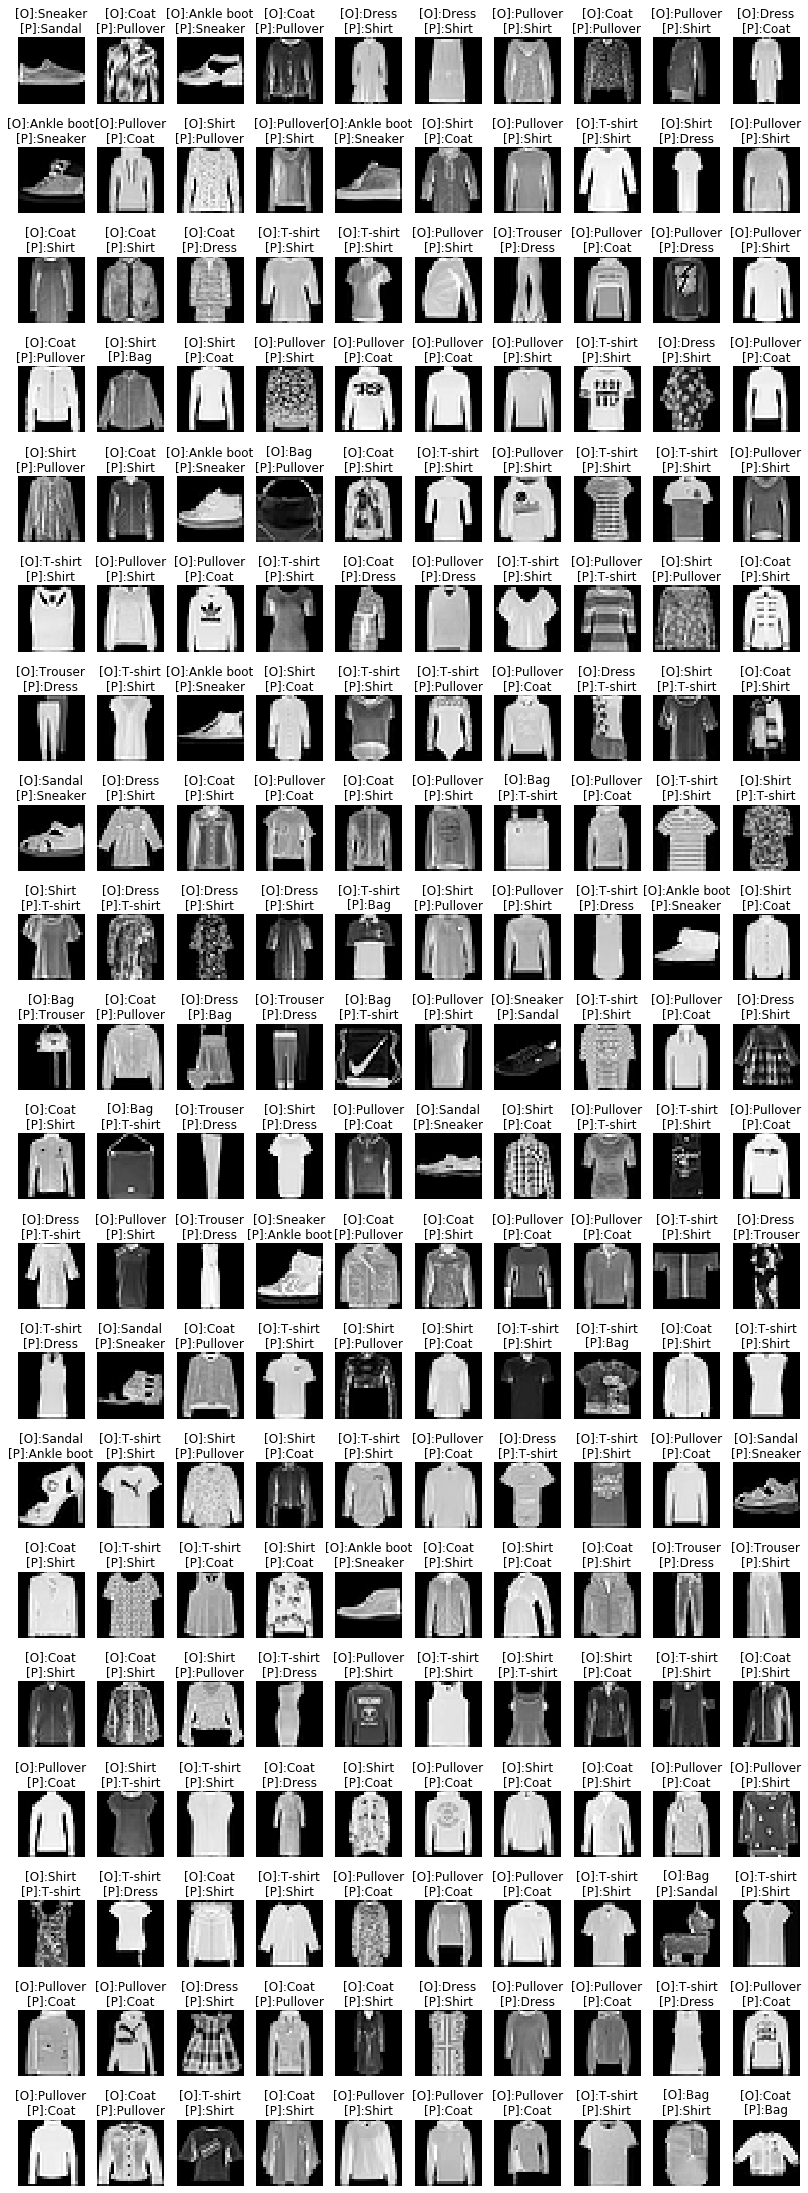

In [13]:
# np: !=來比較每個位置的相等
# nonzero: 找到所有不為0的位置
# [類似list] -> 把所有東西一次拿給你
idx = np.nonzero(pre != y_test)[0][:200]

false_label = y_test[idx]
false_pre = pre[idx]
false_img = x_test[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))

false_collection = zip(false_label, false_pre, false_img)
# 得到每一個: (index, (false_label, pre, img))
for i, (l, p, img) in enumerate(false_collection):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[l],trans[p])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [ ]:
# sorted([("Amy", 5), ("Carol", 4), ("Bob", 3)],
#       key=lambda t:t[1])
from keras.preprocessing.image import load_img
fp = input("請輸入檔案位址:")
img = load_img(fp, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(-1, 784) / 255
ans = model.predict_classes(img_np)[0]
print("機率最高的:", trans[ans])
pre = model.predict(img_np)[0]
z = zip(list(range(10)), pre)
for i, p in sorted(z, key=lambda x:x[1], reverse=True):
    print("是", trans[i], "的機率:", p)
plt.axis("off")
plt.imshow(img, cmap="gray")